# Proyección de Ventas (Dataset 4)
*La intención acá es sustituir al dataset 2 que tiene muy pocas columnas y hace que el uso del mismo para clasificación pueda ser un poco complicado*
Este set de datos contiene información del volumen de ventas para conporación favorita que es una corporación ecuatoriana que posee supermercados a nivel nacional. Los datos involucran volumen de ventas, transacciones, artículos en promoción por categoría, día y ciudad, adicionalmente se anexa precio diario del crudo, ya que como Ecuador es un país petrolero se pretende evaluar si este factor afecta las ventas, también hay información de feriados para evaluar el posible impacto de estos en las ventas e información de las tiendas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import datetime

df_holiday = pd.read_csv(r'D:\coderhouse\data_science\sales-forecasting\store-sales-time-series-forecasting\holidays_events.csv')
df_oil = pd.read_csv(r'D:\coderhouse\data_science\sales-forecasting\store-sales-time-series-forecasting\oil.csv')
df_stores = pd.read_csv(r'D:\coderhouse\data_science\sales-forecasting\store-sales-time-series-forecasting\stores.csv')
df_train = pd.read_csv(r'D:\coderhouse\data_science\sales-forecasting\store-sales-time-series-forecasting\train.csv')
df_transactions = pd.read_csv(r'D:\coderhouse\data_science\sales-forecasting\store-sales-time-series-forecasting\transactions.csv')

#joining train, holiday, oil on date column
df_sales=pd.merge(pd.merge(df_train,df_holiday, on=['date'], how='inner'),df_oil, on=['date'], how='inner')
#display(df_sales.head())

#joining df_sales and stores on store_nbr column
df_sales=pd.merge(df_sales,df_stores, on=['store_nbr'], how='inner')
#display(df_sales.head())

#joining df_sales and transactions on daye and store_nbr column
df_sales=pd.merge(df_sales,df_transactions, how='left', left_on=['date','store_nbr'], right_on=['date','store_nbr'])
display(df_sales.head())
display(df_sales.shape)

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


(352836, 17)

*Las columnas interesantes para el análisis a primera vista parecen ser las columnas de tienda, tipo de tienda, categoría de productos, promociones, feriados, ciudad, ventas y transacciones; sin embargo habría que ver si el precio del dolar y el evento del terremoto de Manabí en el 2016 que se incluye en la tabla feriados afectan considerablemente el comportamiento de las ventas. La idea es predecir las ventas de los 15 días siguientes a la fecha final y se cuenta con un archivo que contiene dichas ventas, el archivo test que no está cargado por ahora en el dataframe.*

In [3]:
df_sales.info()
df_sales.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352836 entries, 0 to 352835
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            352836 non-null  int64  
 1   date          352836 non-null  object 
 2   store_nbr     352836 non-null  int64  
 3   family        352836 non-null  object 
 4   sales         352836 non-null  float64
 5   onpromotion   352836 non-null  int64  
 6   type_x        352836 non-null  object 
 7   locale        352836 non-null  object 
 8   locale_name   352836 non-null  object 
 9   description   352836 non-null  object 
 10  transferred   352836 non-null  bool   
 11  dcoilwtico    322542 non-null  float64
 12  city          352836 non-null  object 
 13  state         352836 non-null  object 
 14  type_y        352836 non-null  object 
 15  cluster       352836 non-null  int64  
 16  transactions  322047 non-null  float64
dtypes: bool(1), float64(3), int64(4), object(9)
memo

,id,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions
count,3.528360e+05,352836.000000,352836.000000,352836.000000,322542.000000,352836.000000,322047.000000
mean,1.628316e+06,27.500000,370.968396,3.402351,65.369558,8.481481,1734.117840
std,7.954575e+05,15.585806,1196.785036,14.857531,25.489987,4.649741,1050.335018
min,0.000000e+00,1.000000,0.000000,0.000000,27.960000,1.000000,54.000000
25%,9.751990e+05,14.000000,0.000000,0.000000,44.880000,4.000000,1030.000000
50%,1.687554e+06,27.500000,12.000000,0.000000,52.010000,8.500000,1409.000000
75%,2.183840e+06,41.000000,202.000000,0.000000,95.250000,13.000000,2148.000000
max,3.000887e+06,54.000000,124717.000000,716.000000,107.950000,17.000000,8359.000000


C:\Users\beltr\AppData\Local\Temp\ipykernel_4916\3133300286.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3=df2.groupby(['date'])['sales','transactions'].sum()


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

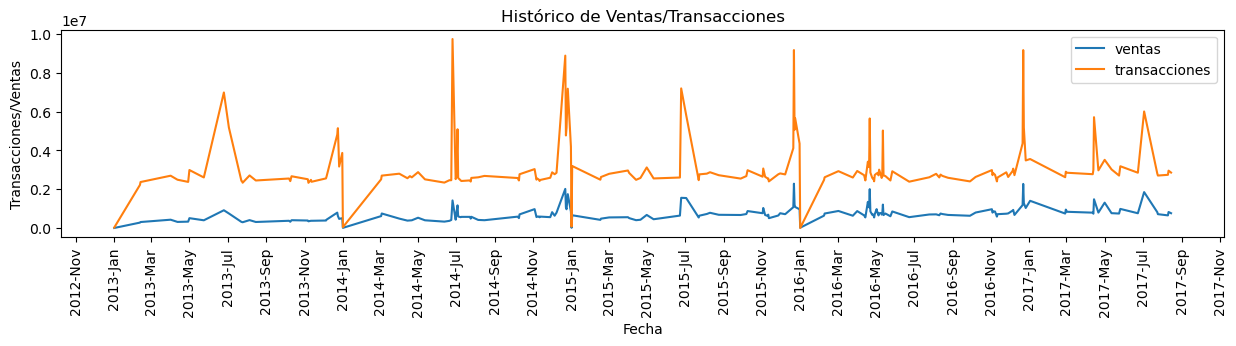

In [4]:
df2=df_sales.copy()
#df2['month'] = pd.DatetimeIndex(df2['date']).month
#df2['year']=pd.DatetimeIndex(df2['date']).year
#df2=df2.set_index(['year','month'])
#df3=df2.groupby(['year','month'])['sales','transactions'].sum()
df2['date'] = pd.to_datetime(df2['date'])
df2.set_index(pd.DatetimeIndex(df2['date']))
#df2.info()

df3=df2.groupby(['date'])['sales','transactions'].sum()

fig, ax = plt.subplots(figsize=(15,2.7))

ax = plt.gca()
ax.plot(df3.index, df3['sales'], label= 'ventas')
ax.plot(df3.index, df3['transactions'], label= 'transacciones')
ax.set_title('Histórico de Ventas/Transacciones')
ax.set_xlabel('Fecha')
ax.set_ylabel('Transacciones/Ventas')
ax.legend()

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,2))) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.setp(ax.get_xticklabels(), rotation=90)

*En este gráfico se aprecia que existe correlación entre el número de transacciones y el volumen de ventas histórico, con picos en abril, julio dependiendo del año y picos en diciembre*

Text(0, 0.5, 'Transacciones')

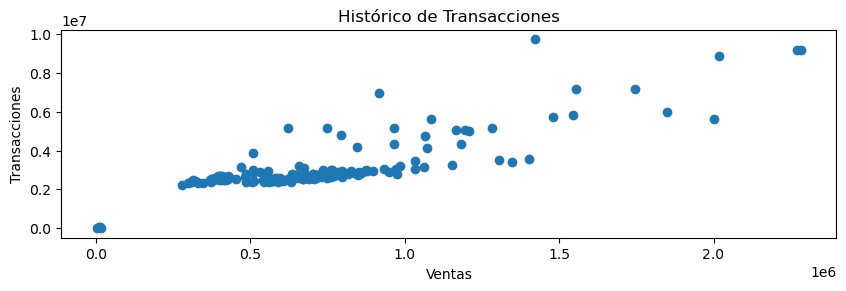

In [5]:
fig, ax = plt.subplots(figsize=(10,2.7))
ax.scatter(df3['sales'], df3['transactions'])
ax.set_title('Histórico de Transacciones')
ax.set_xlabel('Ventas')
ax.set_ylabel('Transacciones')


*Acá se puede mejor la relación con algunos puntos aislados de la tendencia, valdrá la pena evaluar en el futuro la influencia de la fecha/periodo/promociones/ciudad en esta correlacionalidad*

Text(0, 0.5, 'Número de Transacciones')

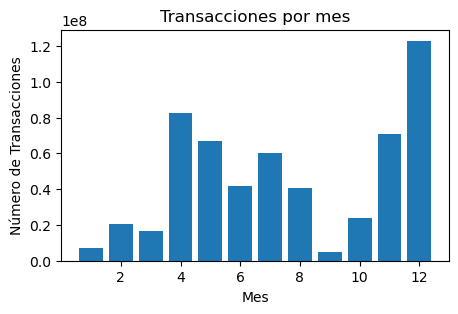

In [6]:
df2['month'] = pd.DatetimeIndex(df2['date']).month
df2['year']=pd.DatetimeIndex(df2['date']).year
df3=df2.groupby(['month'],as_index=False)['transactions'].agg("sum")
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(df3['month'], df3['transactions'])
ax.set_title('Transacciones por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Número de Transacciones')

*Acá agrupando las transacciones por mes (sin considerar la tienda o la ciudad) se aprecia que existe estacionalidad con un mayor nivel de transacciones en diciembre, seguido por abril y noviembre, sería importante evaluar si el comportamiento de en abril es para todos los años o si por el contrario es para un año en específico para evaluar a fondo el motivo de un mayor volumen de ventas en este mes*

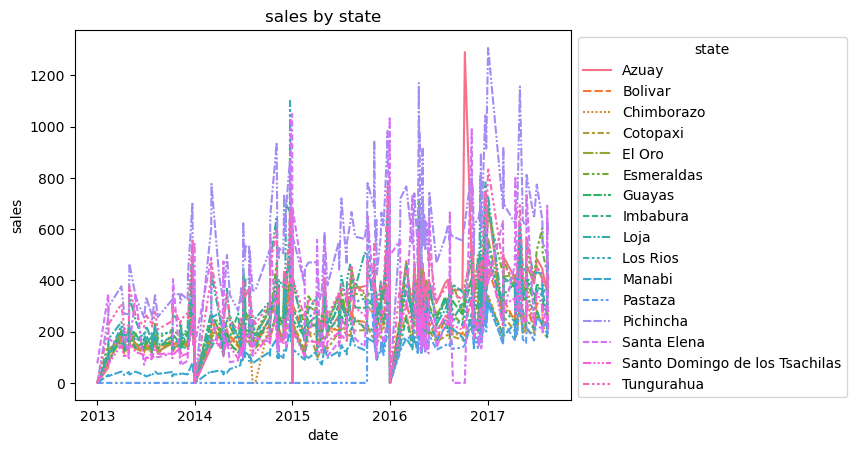

In [16]:
ventas_estado=df2.pivot_table(index=['date'],columns='state',values='sales')
ax=sns.lineplot(data=ventas_estado)
ax.set(xlabel='date', ylabel='sales', title='sales by state')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#sns.boxplot(data=df, x="fare", y="deck", hue="deck", dodge=False)

*En este gráfico observamos que las ventas varían de acuerdo al estado, y que se presentan picos de ventas hacia el mes diciembre como apreciamos en un gráfico anterior.*

*A pesar que la escala de colores no es la mejor parece ser que el mayor volumen de ventas se da en Pichincha lo cual es lógico al ser la capital, seguido por Guayas y Azuay que son los estados donde se concentra mayor de población, luego de la capital*

[Text(0.5, 1.0, 'sales by day')]

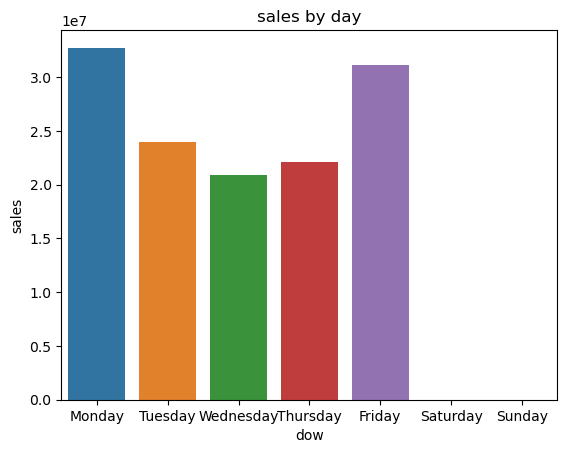

In [47]:
df2['dow'] = df2['date'].dt.day_name() #calcular el día de la semana
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df2['dow_order'] = df2['dow'].map({day:i for i, day in enumerate(dow_order)})
df2.sort_values(by='dow_order', inplace=True)

#agrupar por días de la semana
ventas_dia = df2.groupby('dow').agg({'sales':'sum'}).reset_index()
ventas_dia.columns = ['dow', 'sales']

ax=sns.barplot(data=ventas_dia, x="dow", y="sales",order=dow_order)
ax.set(title='sales by day')

*En una exploración inicial de los datos no se observó que hubiese datos para cada día de la semana, de acuerdo a la exploración en estos datos parece no haber datos para días en fin de semana; sin embargo se aprecia como las ventas corresponden mayormente a días viernes y lunes, el viernes yo díria que es por estar cerca del fin de semana, y en el caso del día lunes en Ecuador los feriados se mueven a día lunes o viernes, lo cual explicaría también el incremento de las ventas en estos días cercanos al fin de semana*

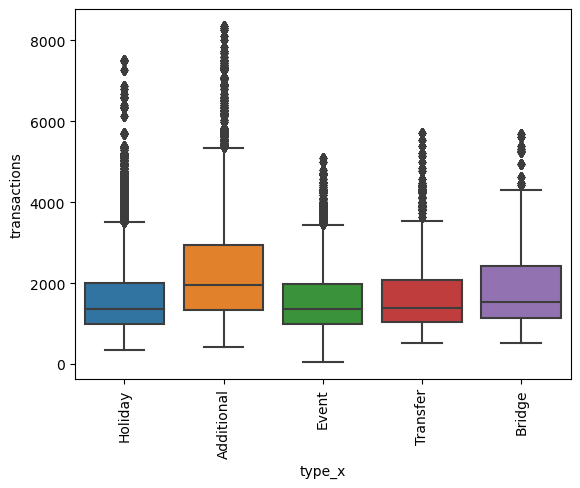

In [57]:
ax = sns.boxplot(x = 'type_x', y = 'transactions', data = df2)
ax.tick_params(axis='x', rotation=90)

*Se puede apreciar que la mayor cantidad de transacciones se da en los tipos de feriado "additional", seguid por "bridge" mientras que los otros tipos de feriados es bastante pareja la distribución de transacciones*